# Max-Cut Sample - Hybrid


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
import dimod

### Helper Functions

In [2]:
def draw_graph(G,cut,pos):
    colors = [ 'g' if n in cut else 'r' for n in G.nodes() ]
    nx.draw(G,with_labels=False,alpha=0.6,node_size=50,node_color=colors,pos=pos)
    
def cut_size(G,cut):
    edges = 0
    for c in cut:
        for n in G.neighbors(c):
            if n not in cut:
                edges += 1
    return edges
    


## Problem as Graph

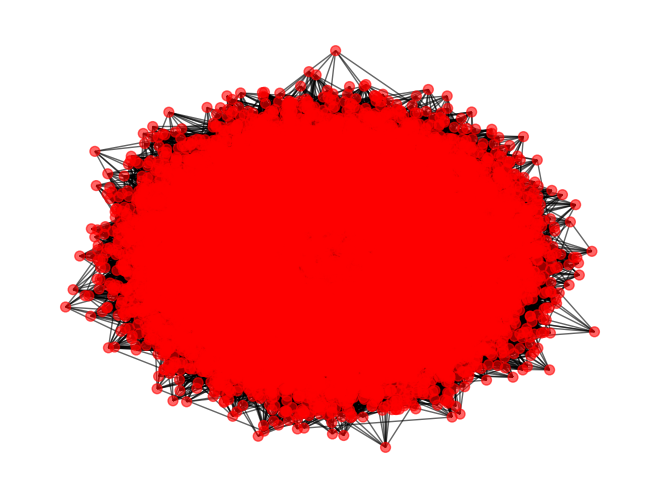

In [3]:
# fixed graph
#G = nx.Graph()
#G.add_nodes_from([0,1,2,3,4])
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,4),(2,4),(3,4),(1,4)])

# loaded sample graph
G = nx.read_edgelist('../sample_graphs/15000-nodes-sample.dat',nodetype=int)

#n = 4
#p = 0.3
#H = nx.gnp_random_graph(n, p)
pos = nx.spring_layout(G)

#nx.draw(G,with_labels=True,alpha=0.6,node_size=300,pos=pos)
draw_graph(G,{},pos)

In [4]:
print('Graph: ',len(G.nodes()), 'nodes, density: ',nx.density(G))

Graph:  15000 nodes, density:  0.0015050425583927817


## Exact Solver

In [5]:
exactsolver = dimod.ExactSolver()

In [6]:
#import time

#ts_start = time.time()
#cut = dnx.maximum_cut(G, exactsolver)
#ts_stop = time.time()
#print(cut)
#print('elapsed time of exact solver (s): ',round(ts_stop - ts_start,2))

In [7]:
#draw_graph(G,cut,pos)

In [8]:
#print('cut-size: ',cut_size(G,cut))

## Hybrid Solver

In [9]:
from dwave.system import LeapHybridSampler

label = 'max-cut, n: ' + str(len(G.nodes())) + ', d: ' + str(round(nx.density(G),2)) + ' hybrid'

hybridsampler = LeapHybridSampler()
cut = dnx.maximum_cut(G, hybridsampler,label=label)

In [10]:
cut

{0,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 14,
 15,
 17,
 18,
 19,
 20,
 22,
 24,
 30,
 32,
 35,
 36,
 38,
 39,
 41,
 44,
 46,
 47,
 51,
 53,
 54,
 55,
 56,
 58,
 62,
 64,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 79,
 81,
 82,
 83,
 84,
 87,
 88,
 90,
 91,
 93,
 95,
 98,
 99,
 100,
 103,
 109,
 110,
 113,
 114,
 124,
 125,
 128,
 129,
 130,
 131,
 134,
 135,
 136,
 138,
 141,
 144,
 145,
 147,
 148,
 151,
 155,
 156,
 157,
 159,
 161,
 162,
 163,
 164,
 165,
 171,
 172,
 173,
 176,
 177,
 178,
 183,
 184,
 187,
 188,
 191,
 193,
 195,
 198,
 199,
 201,
 204,
 205,
 206,
 207,
 208,
 209,
 218,
 219,
 220,
 221,
 224,
 227,
 229,
 232,
 233,
 235,
 237,
 238,
 239,
 241,
 242,
 247,
 250,
 251,
 253,
 254,
 257,
 258,
 261,
 262,
 263,
 264,
 270,
 272,
 273,
 274,
 275,
 283,
 286,
 287,
 288,
 291,
 292,
 293,
 294,
 295,
 297,
 298,
 300,
 301,
 305,
 306,
 310,
 311,
 312,
 315,
 316,
 318,
 320,
 321,
 323,
 326,
 327,
 329,
 330,
 332,
 333,
 340,
 341,
 346,
 348,
 351,
 352,
 354,
 

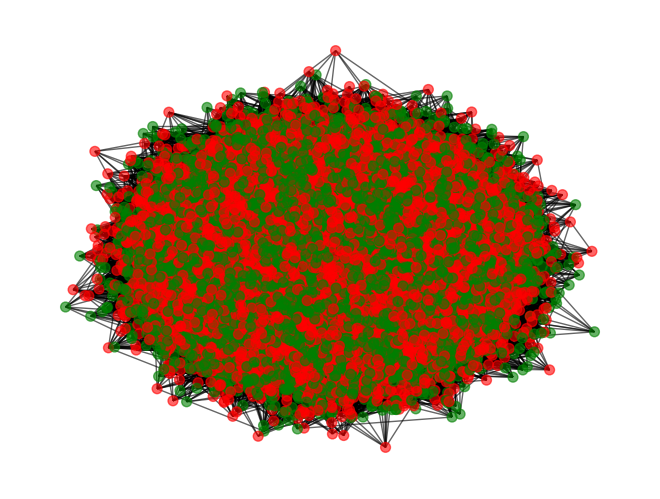

In [11]:
draw_graph(G,cut,pos)

In [12]:
print('cut-size: ',cut_size(G,cut))

cut-size:  111448


In [13]:
len(list(G.neighbors(3455)))

21